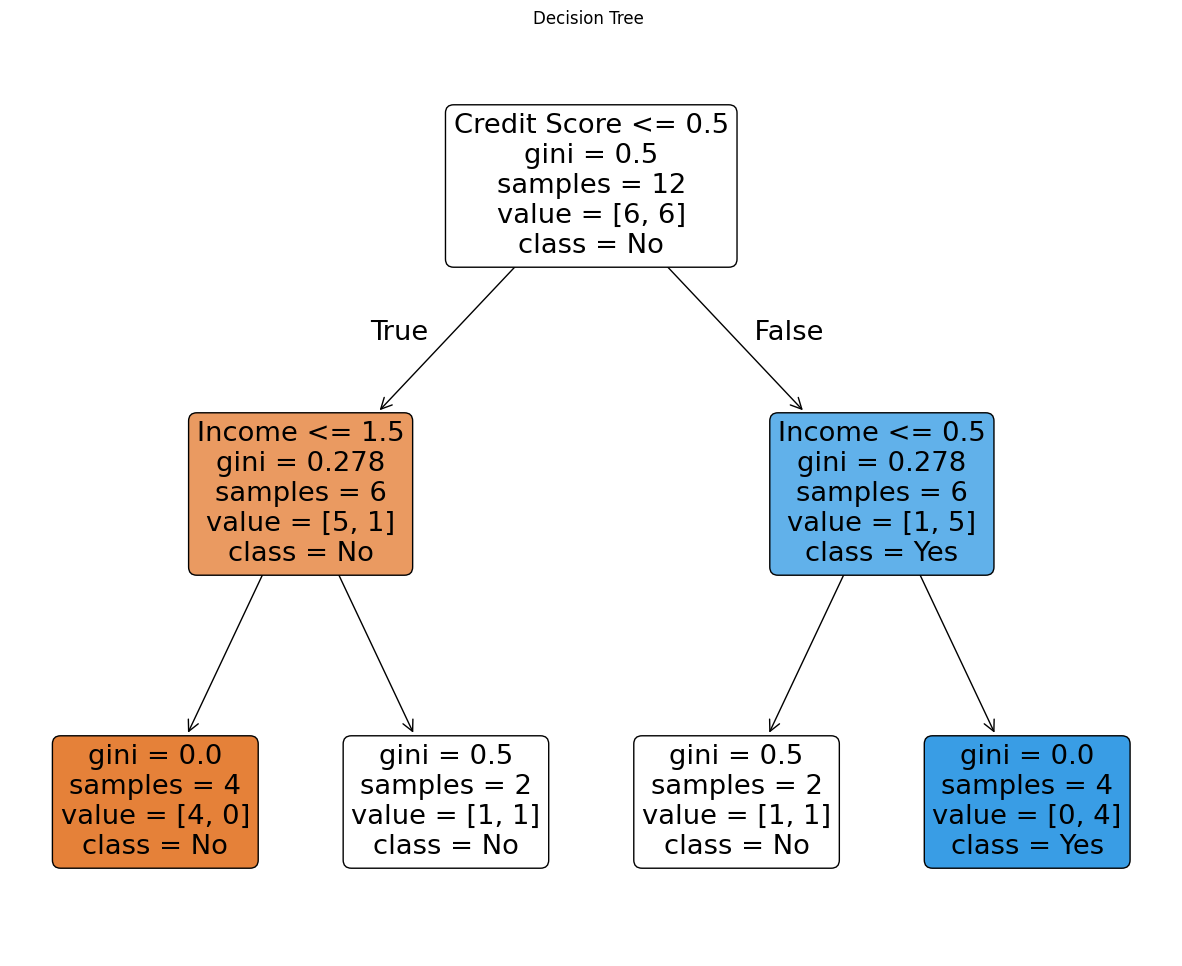

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Define your data
data = {
'Customer': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6','C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
'Income': ['High', 'Low', 'Medium', 'Low', 'High', 'Medium','Medium', 'Low', 'High', 'Medium', 'Low', 'High'],
'Credit Score': ['Good', 'Poor', 'Good', 'Good', 'Poor', 'Poor','Poor', 'Good', 'Poor', 'Good', 'Poor', 'Good'],
'Age': [25, 40, 35, 28, 30, 45, 32, 29, 41, 38, 27, 44],
'Loan Approved': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No','No', 'Yes', 'No', 'Yes', 'No', 'Yes']
}

# data = {
#     'Customer': ['C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
#     'Income': ['Medium', 'Low', 'High', 'Medium', 'Low', 'High'],
#     'Credit Score': ['Poor', 'Good', 'Poor', 'Good', 'Poor', 'Good'],
#     'Age': [32, 29, 41, 38, 27, 44],
#     'Loan Approved': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes']
# }

df = pd.DataFrame(data)

# Step 2: Encode manually as you structured
df['Income'] = df['Income'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Credit Score'] = df['Credit Score'].map({'Poor': 0, 'Good': 1})
df['Loan Approved'] = df['Loan Approved'].map({'No': 0, 'Yes': 1})

# Step 3: Use only Income and Credit Score (ignore Age since your tree does)
X = df[['Income', 'Credit Score']]
y = df['Loan Approved']

# Step 4: Train Decision Tree (mimic your structure)
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X, y)

# Step 5: Visualize to confirm it matches your logic
plt.figure(figsize=(15, 12))
plot_tree(model, feature_names=['Income', 'Credit Score'], class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title("Decision Tree ")
plt.show()


Information Gain der einzelnen Features:
Income_Low: 0.0933
Income_Medium: 0.0000
Credit Score_Poor: 0.3500
Age: 1.0000


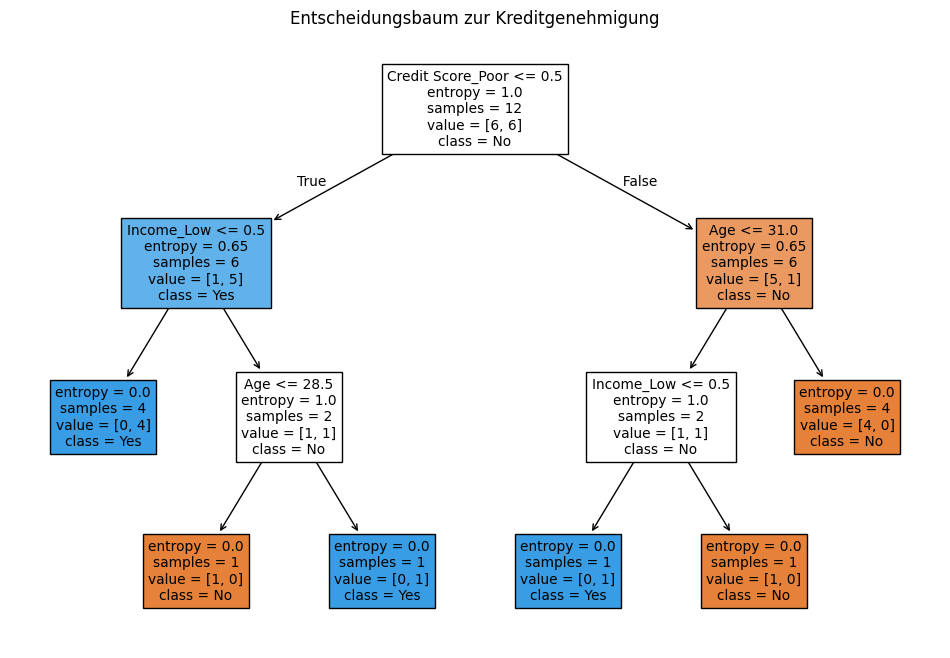


Entscheidungsbaum Regeln:
 |--- Credit Score_Poor <= 0.50
|   |--- Income_Low <= 0.50
|   |   |--- class: 1
|   |--- Income_Low >  0.50
|   |   |--- Age <= 28.50
|   |   |   |--- class: 0
|   |   |--- Age >  28.50
|   |   |   |--- class: 1
|--- Credit Score_Poor >  0.50
|   |--- Age <= 31.00
|   |   |--- Income_Low <= 0.50
|   |   |   |--- class: 1
|   |   |--- Income_Low >  0.50
|   |   |   |--- class: 0
|   |--- Age >  31.00
|   |   |--- class: 0



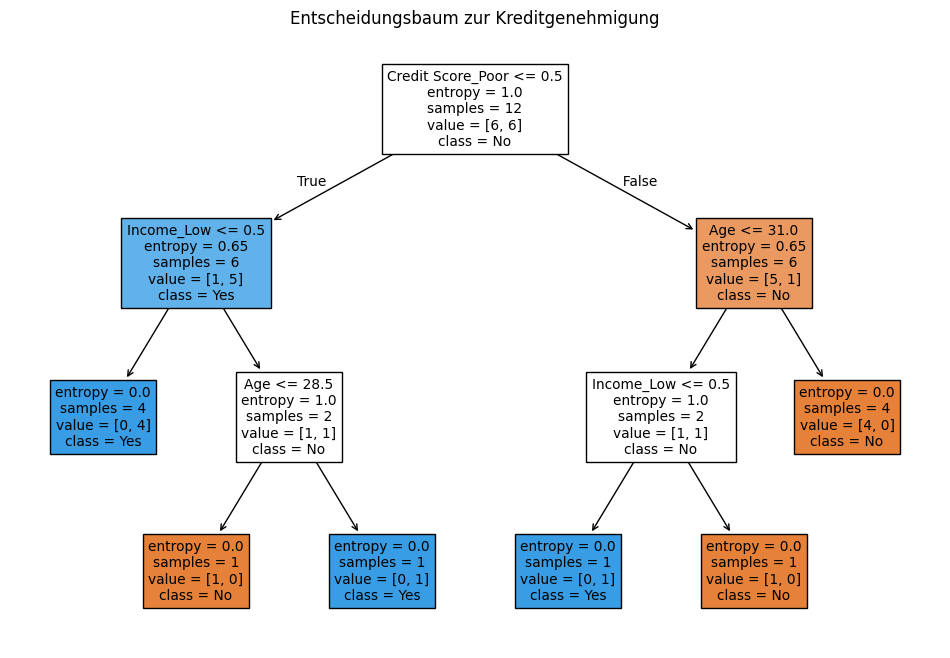

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math

data = {
    'Customer': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12'],
    'Income': ['High', 'Low', 'Medium', 'Low', 'High', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Low', 'High'],
    'Credit Score': ['Good', 'Poor', 'Good', 'Good', 'Poor', 'Poor', 'Poor', 'Good', 'Poor', 'Good', 'Poor', 'Good'],
    'Age': [25, 40, 35, 28, 30, 45, 32, 29, 41, 38, 27, 44],
    'Loan Approved': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Funktion zur Berechnung der Entropie
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

# Funktion zur Berechnung des Information Gain
def information_gain(X, y, feature_index):
    n_samples = len(y)
    feature_values = np.unique(X[:, feature_index])
    weighted_entropy = 0
    for value in feature_values:
        indices = np.where(X[:, feature_index] == value)[0]
        y_subset = y[indices]
        weighted_entropy += len(y_subset) / n_samples * entropy(y_subset)
    return entropy(y) - weighted_entropy

# Konvertiere kategoriale Features in numerische Werte für die Entropieberechnung
df_encoded = pd.get_dummies(df[['Income', 'Credit Score']], drop_first=True)
X_encoded = np.concatenate([df_encoded.values, df['Age'].values.reshape(-1, 1)], axis=1)
y_encoded = np.where(df['Loan Approved'] == 'Yes', 1, 0)

# Berechne den Information Gain für jedes Feature
information_gains = {}
feature_names_encoded = list(df_encoded.columns) + ['Age']
for i, feature_name in enumerate(feature_names_encoded):
    ig = information_gain(X_encoded, y_encoded, i)
    information_gains[feature_name] = ig

print("Information Gain der einzelnen Features:")
for feature, gain in information_gains.items():
    print(f"{feature}: {gain:.4f}")

# Training eines Entscheidungsbaums zur Visualisierung
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree.fit(X_encoded, y_encoded)

# Visualisierung des Entscheidungsbaums
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=feature_names_encoded, class_names=['No', 'Yes'], filled=True)
plt.title("Entscheidungsbaum zur Kreditgenehmigung")
plt.show()

# Textuelle Repräsentation des Entscheidungsbaums
tree_rules = export_text(tree, feature_names=feature_names_encoded)
print("\nEntscheidungsbaum Regeln:\n", tree_rules)

# Visualisierung des Entscheidungsbaums
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=feature_names_encoded, class_names=['No', 'Yes'], filled=True)
plt.title("Entscheidungsbaum zur Kreditgenehmigung")
plt.show()